In [2]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()
#import plotly.express as px
import numpy as np # linear algebra
import pandas as pd
import warnings
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
df=pd.read_csv("C:\\Users\\BEST BUY COMPUTERS\\Downloads\\DATA SETS\\processed_cleveland.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
dtype: object

#CHECK OF GARBADE VALUE IF ANY

In [6]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

ca
0    176
1     65
2     38
3     20
?      4
Name: count, dtype: int64
******************************
thal
3    166
7    117
6     18
?      2
Name: count, dtype: int64
******************************


AS seen ca and thal have garbage values

In [8]:
df["thal"].value_counts(True)

thal
3    0.547855
7    0.386139
6    0.059406
?    0.006601
Name: proportion, dtype: float64

In [9]:
df["ca"].value_counts(True)

ca
0    0.580858
1    0.214521
2    0.125413
3    0.066007
?    0.013201
Name: proportion, dtype: float64

As garbage values are low percentaege we can drop them

In [10]:
df = df[(df['thal'] != '?') & (df['ca'] != '?')]

In [11]:
df["ca"].value_counts(True)

ca
0    0.585859
1    0.218855
2    0.127946
3    0.067340
Name: proportion, dtype: float64

In [12]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
dtype: object

**CONVERTING CA AND THAL TO NUM**

In [14]:
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')

In [15]:
df['ca'] = pd.to_numeric(df['ca'],errors = 'coerce')

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**OUTLEAR DETECTION**

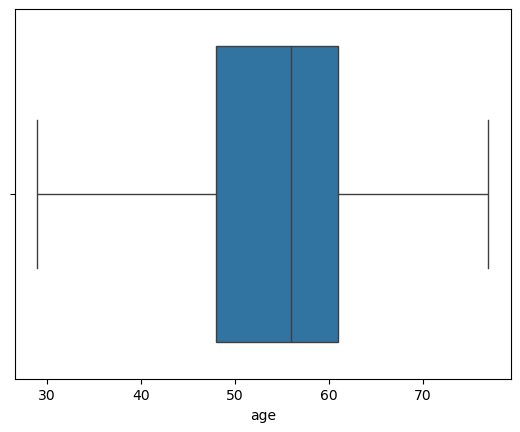

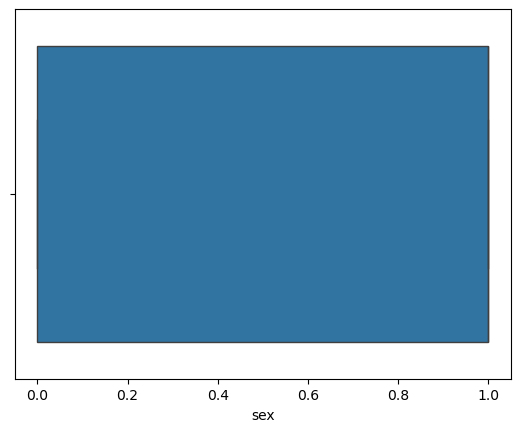

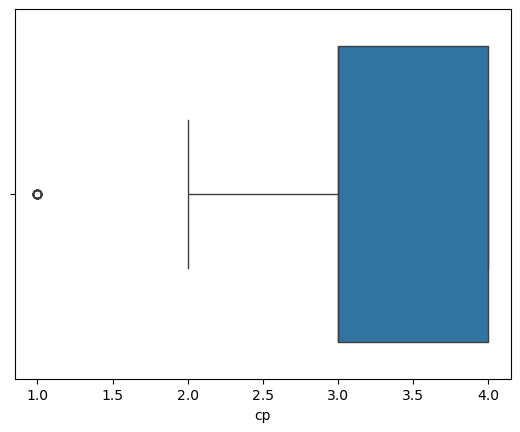

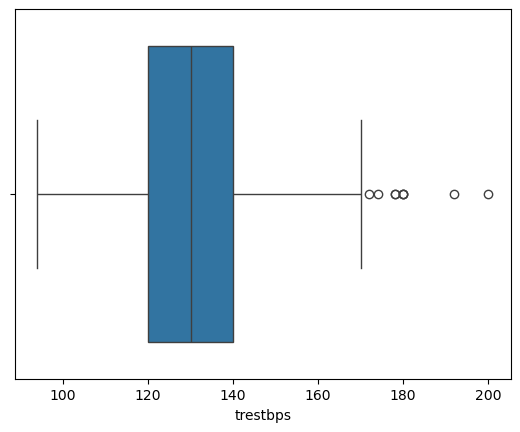

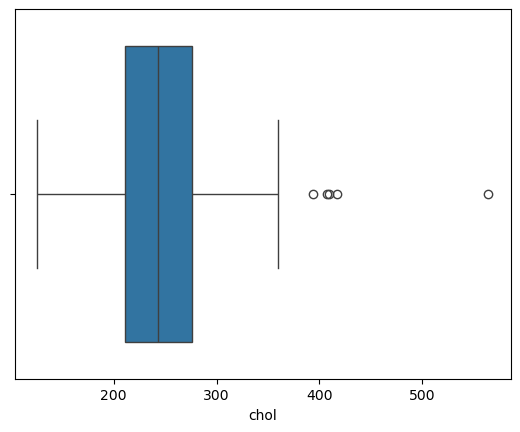

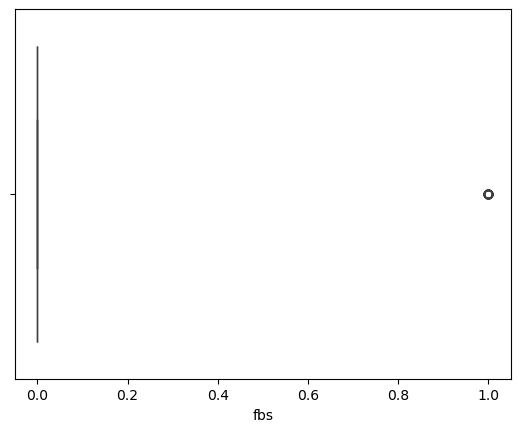

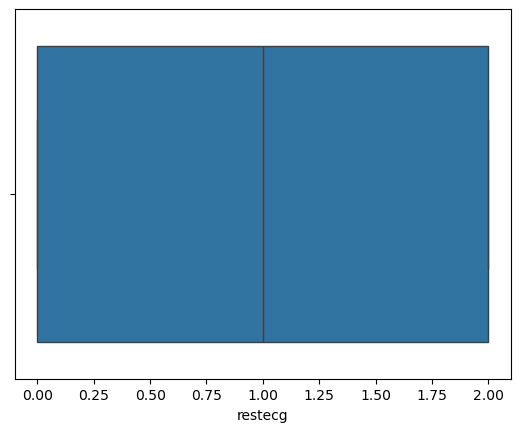

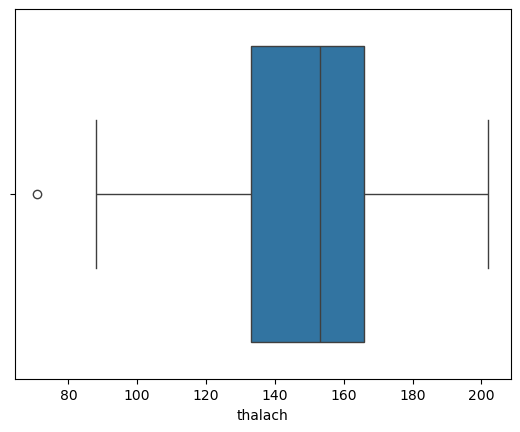

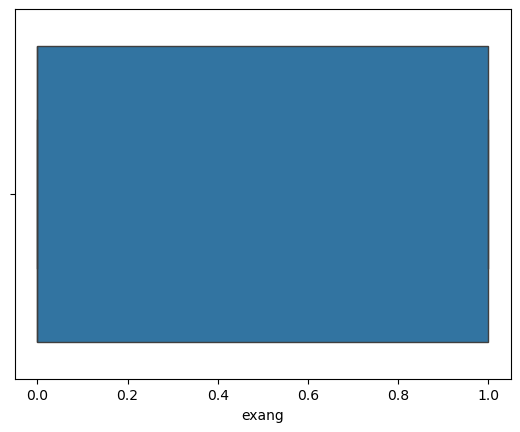

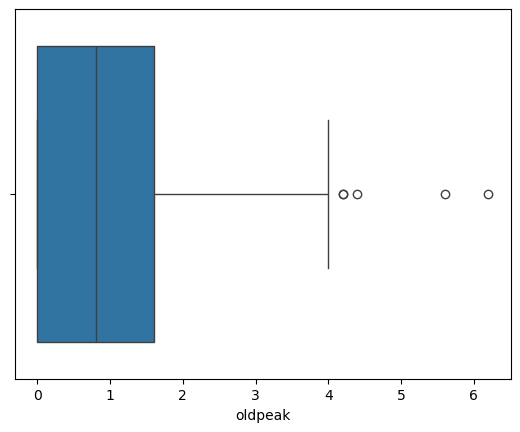

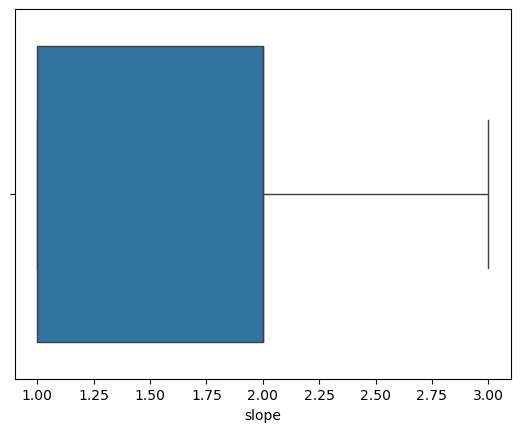

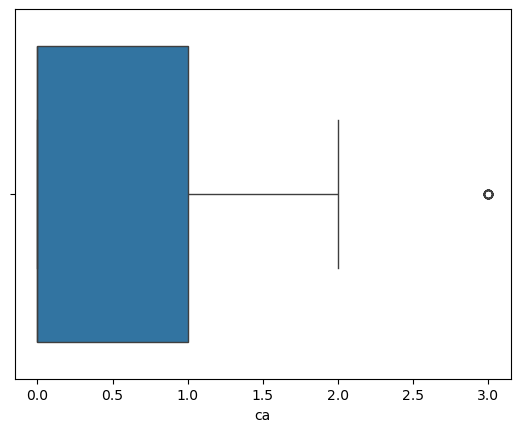

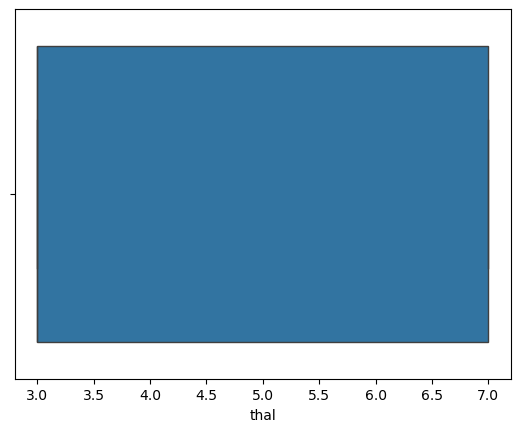

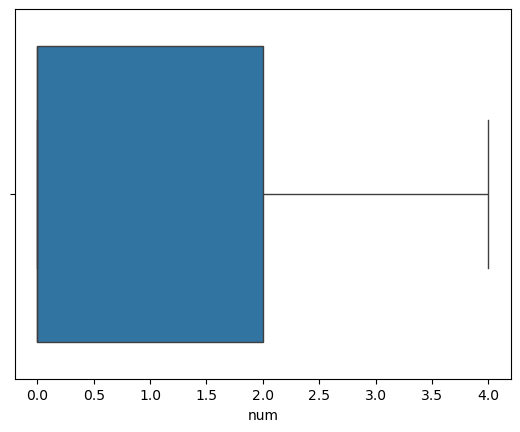

In [19]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

***EDA***

C:\Users\BEST BUY COMPUTERS\AppData\Local\Temp\ipykernel_9444\2958743176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


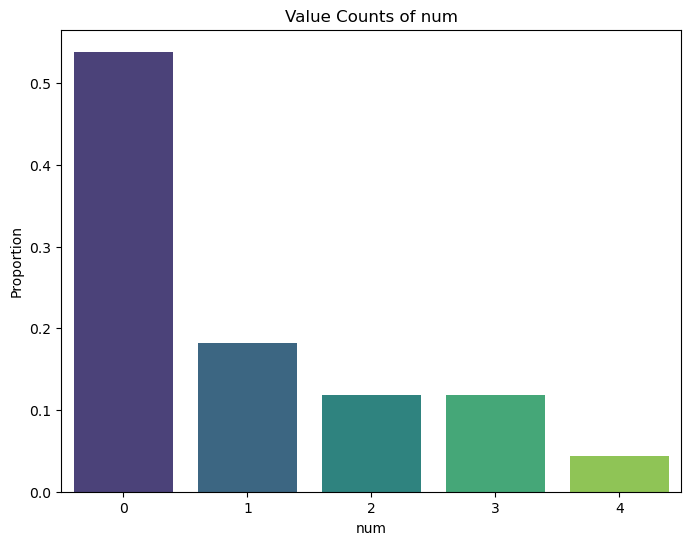

In [21]:
value_counts = df['num'].value_counts(normalize=True)

# Plot value counts
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('num')
plt.ylabel('Proportion')
plt.title('Value Counts of num')
plt.show()

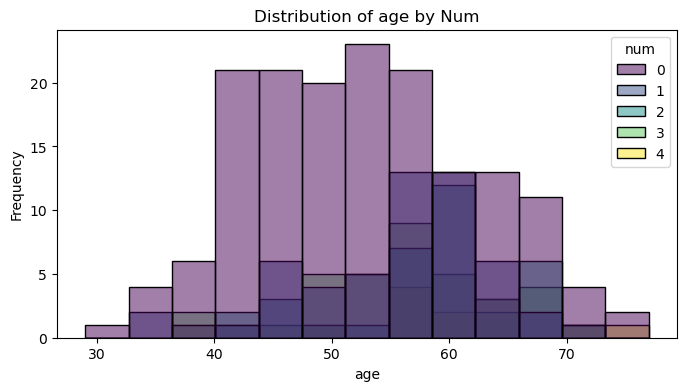

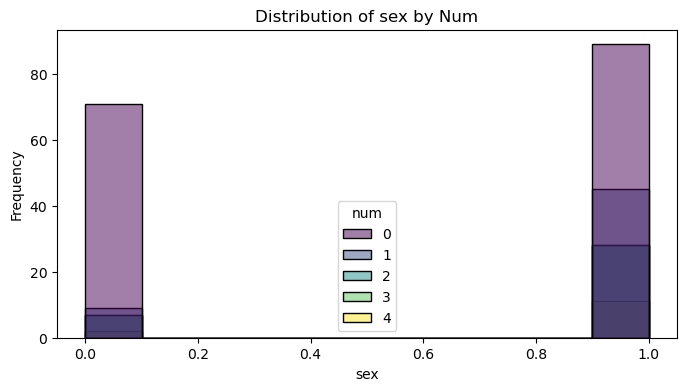

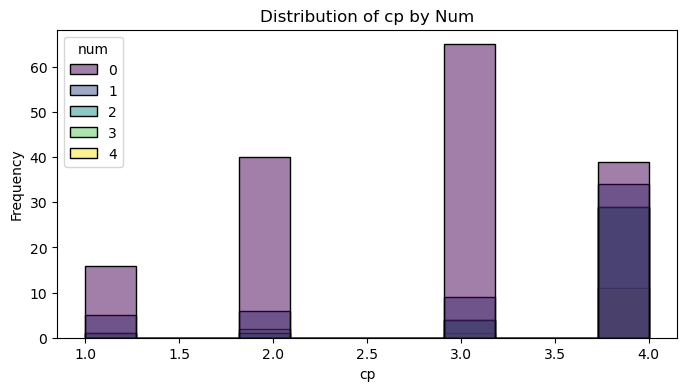

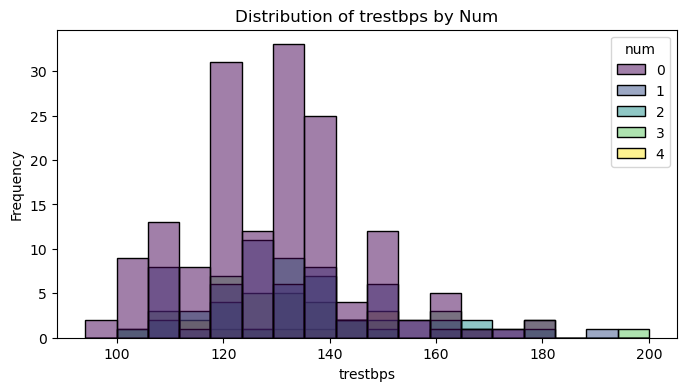

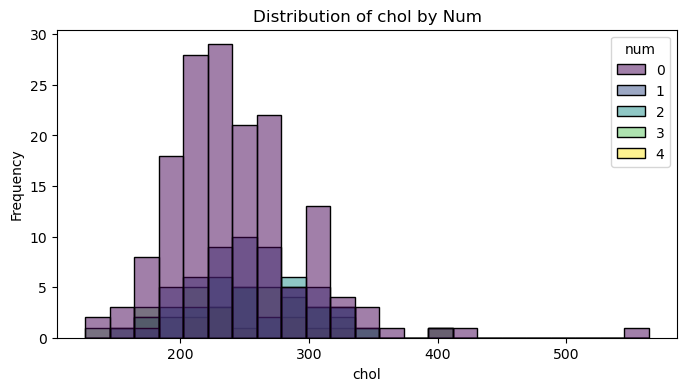

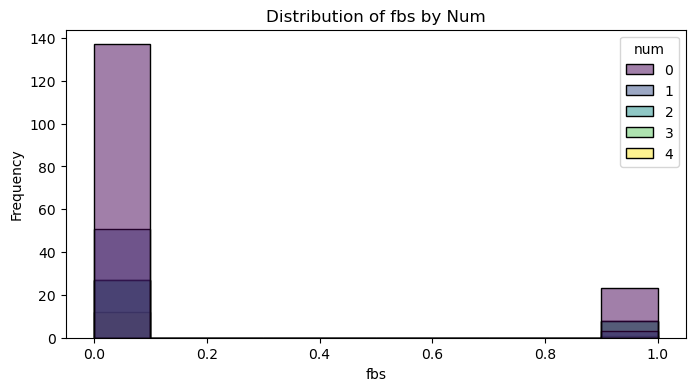

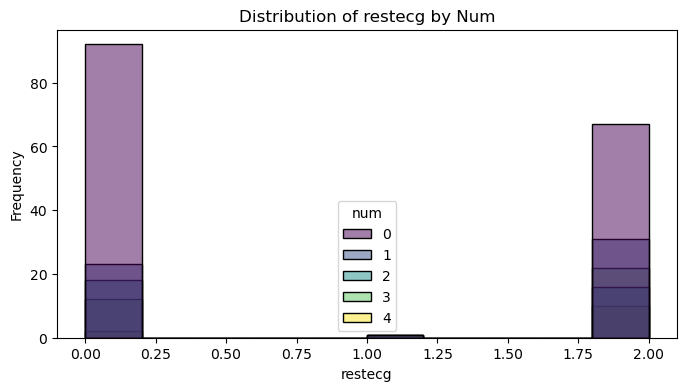

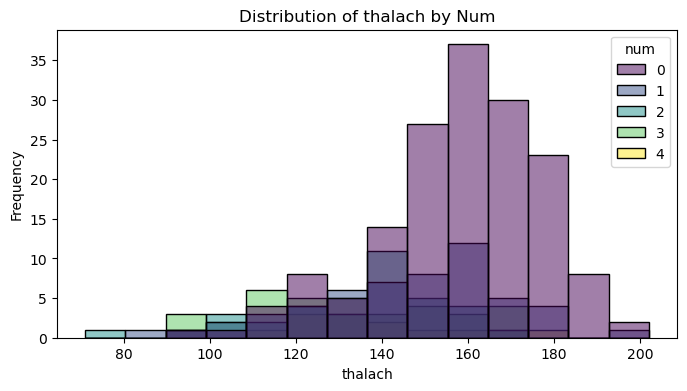

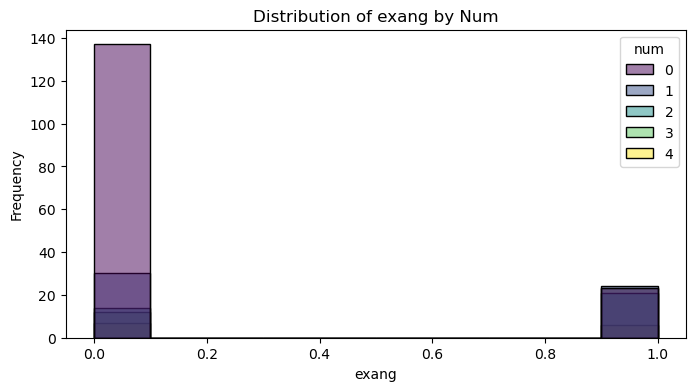

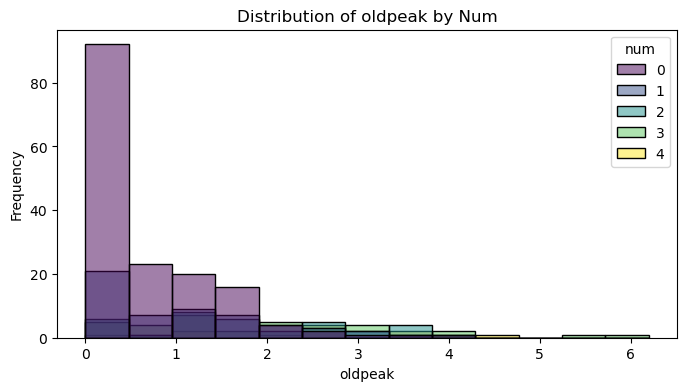

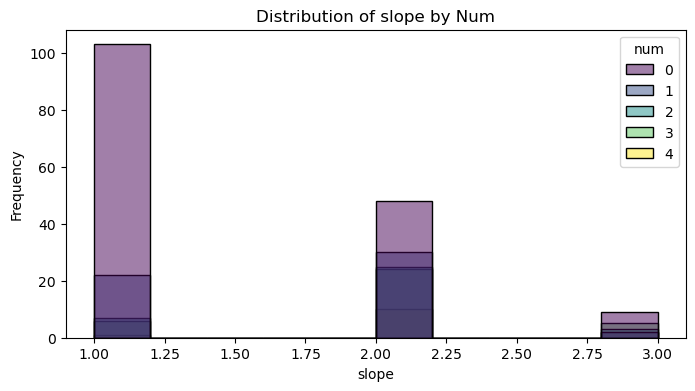

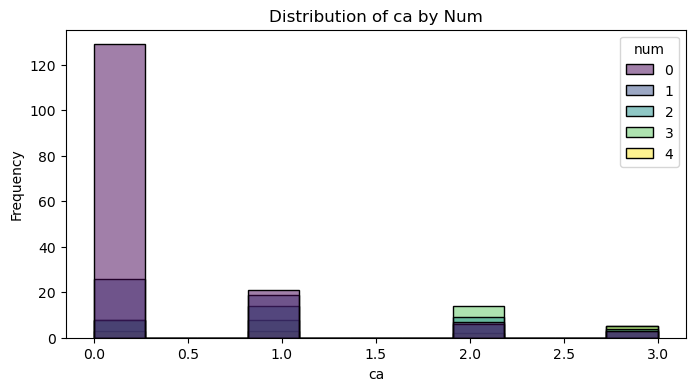

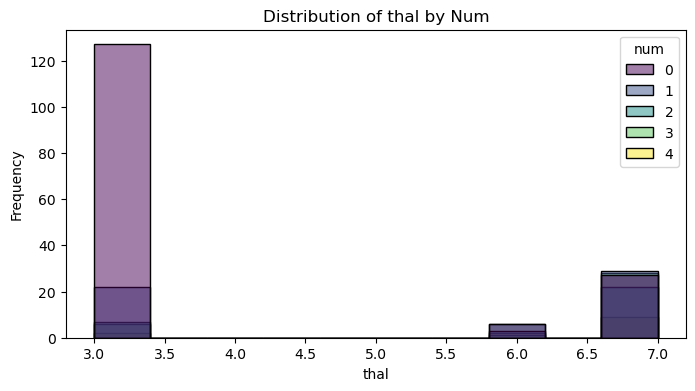

In [32]:
# List of features to plot
num_col = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
            'exang', 'oldpeak', 'slope', 'ca', 'thal']


for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, hue='num', palette='viridis')
    plt.title(f'Distribution of {col} by Num')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

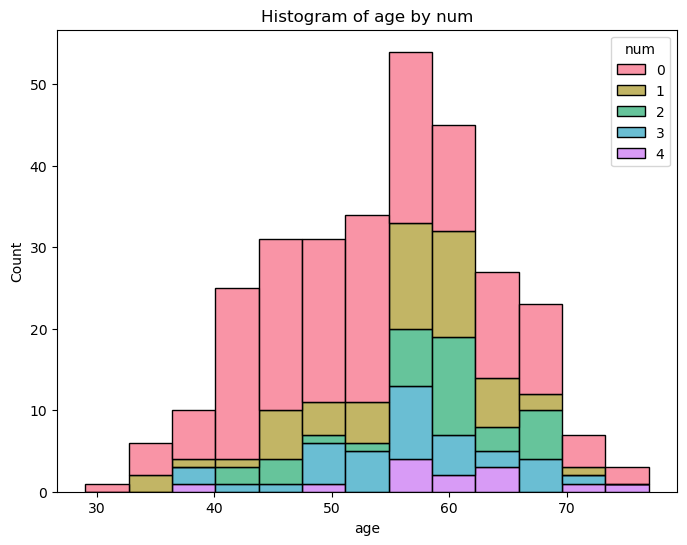

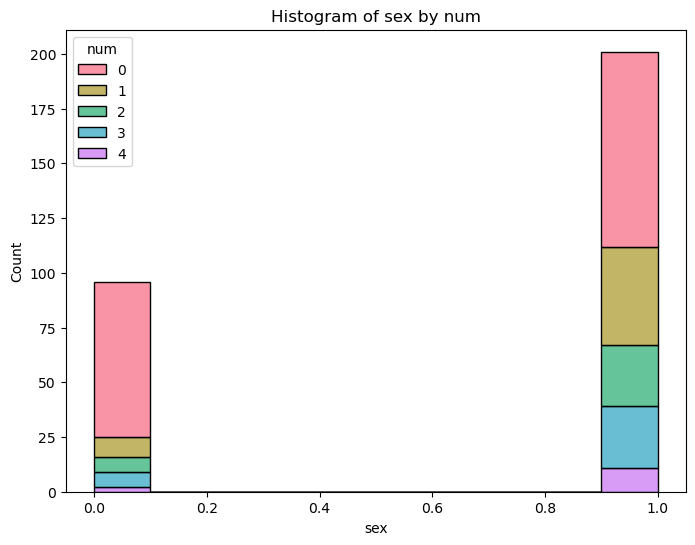

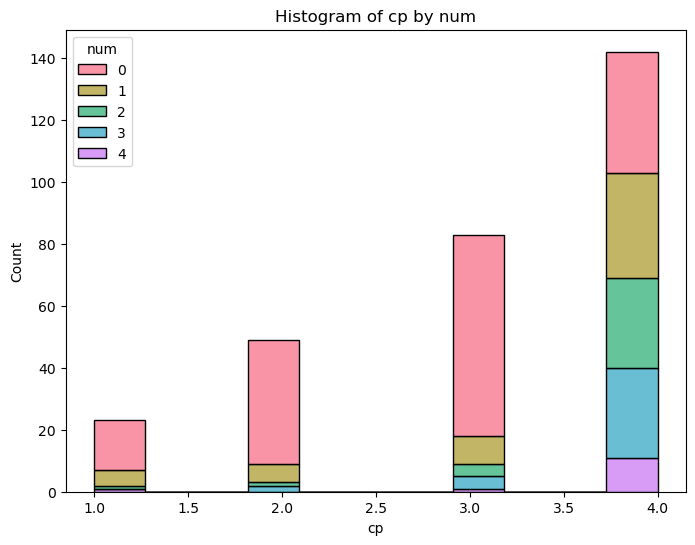

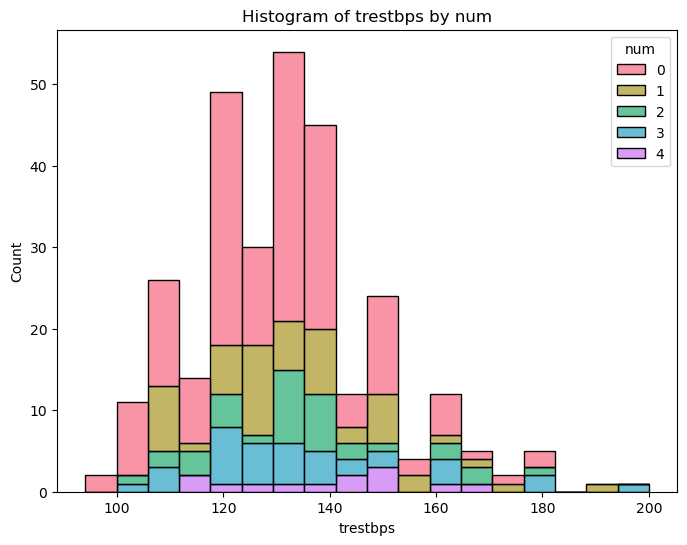

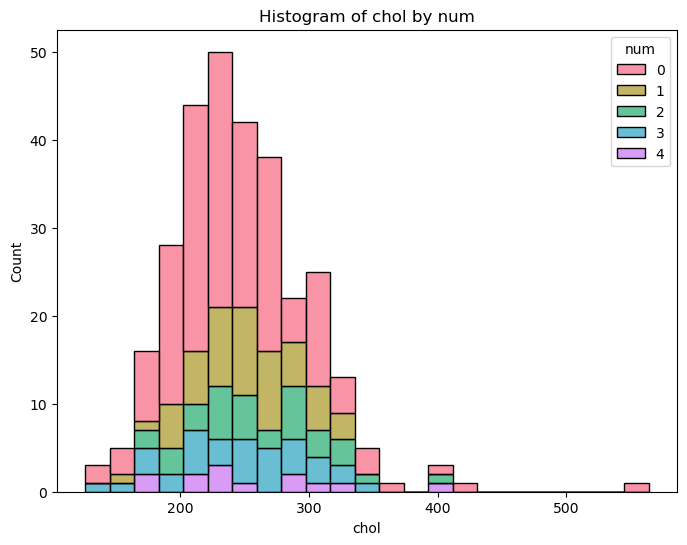

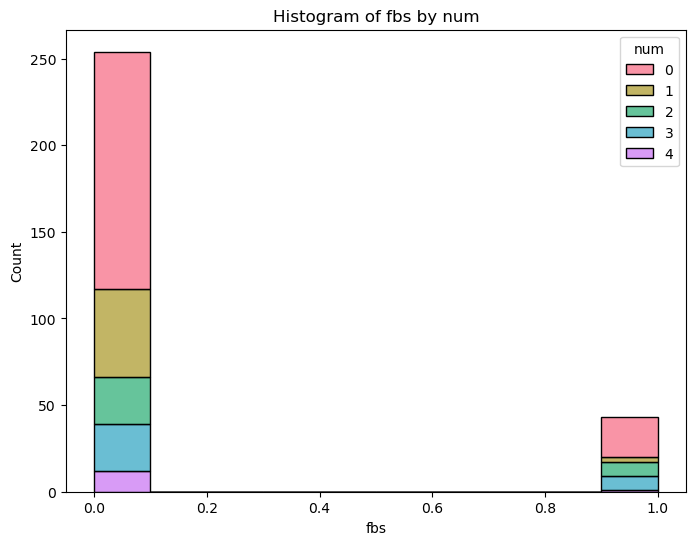

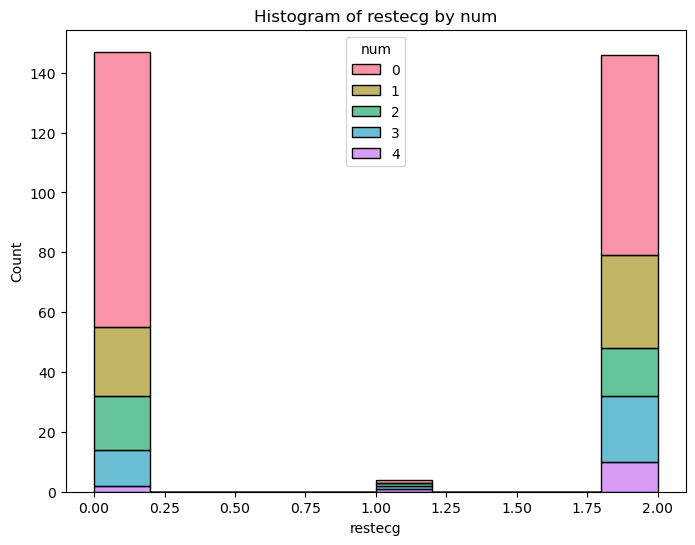

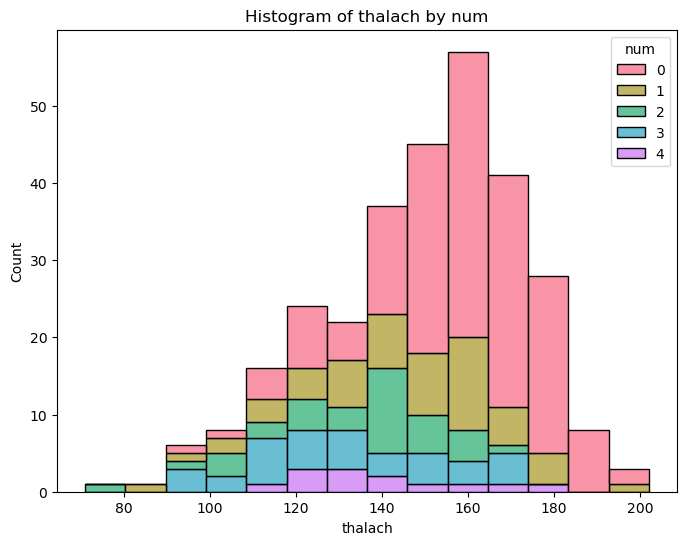

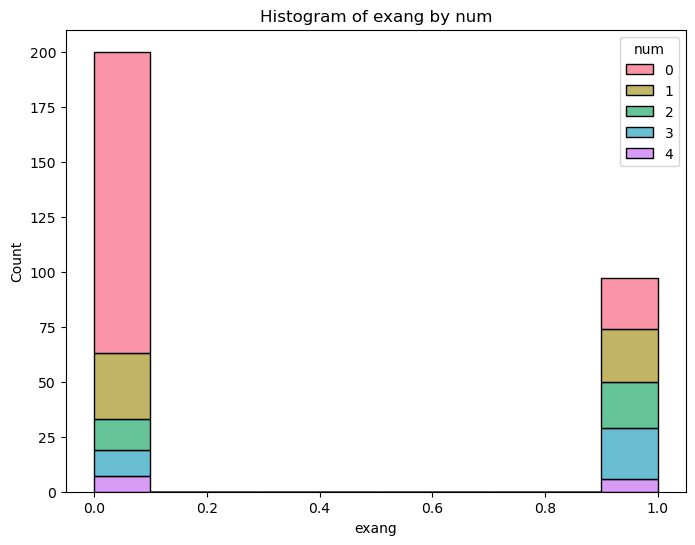

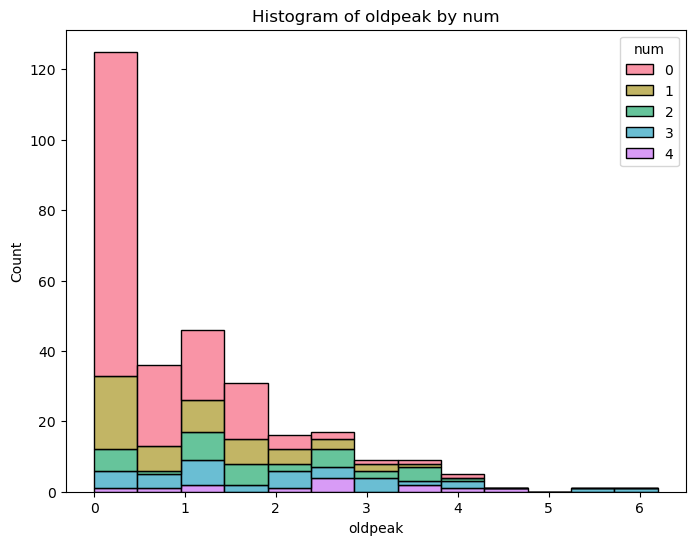

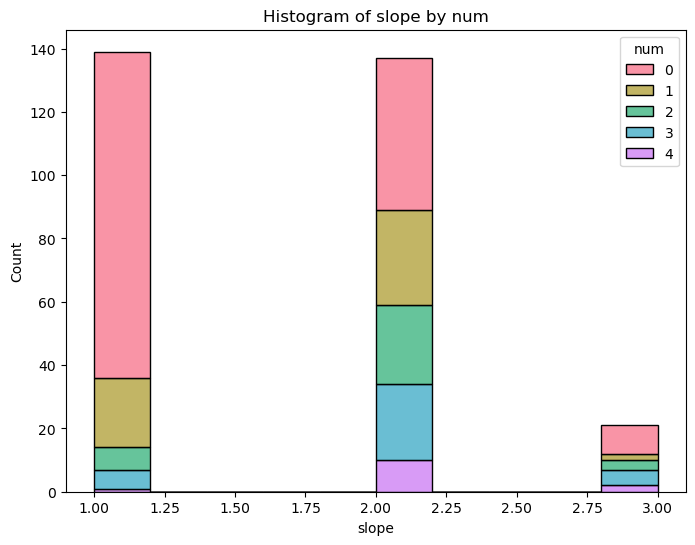

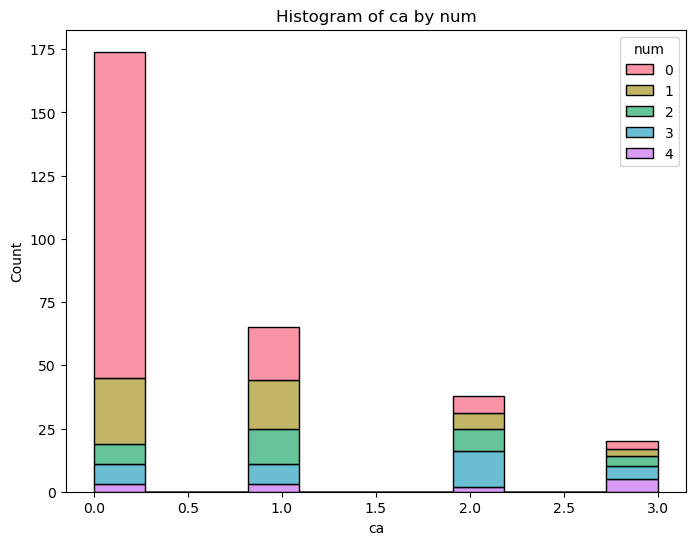

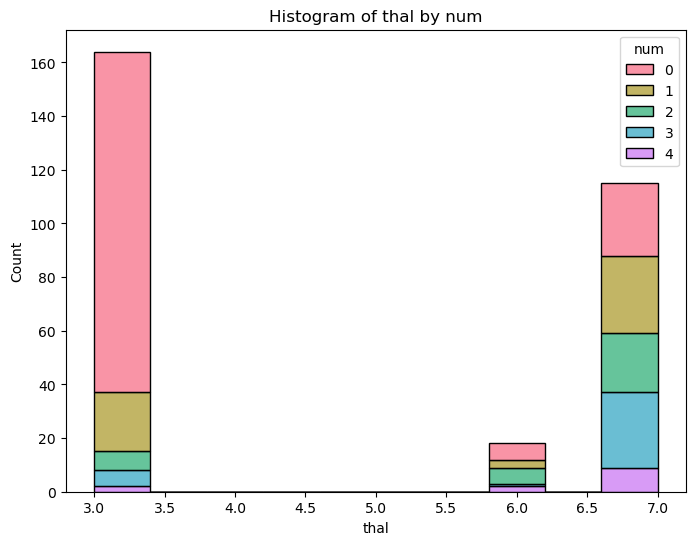

In [26]:
# List of features to plot
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
            'exang', 'oldpeak', 'slope', 'ca', 'thal']


palette = sns.color_palette('husl', n_colors=len(df['num'].unique()))

# Plot histograms
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='num', multiple='stack',palette=palette)
    plt.title(f'Histogram of {feature} by num')
    plt.show()

In [33]:
cor1=df.corr()
cor1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


Text(0.5, 1.0, 'Correlation Matrix')

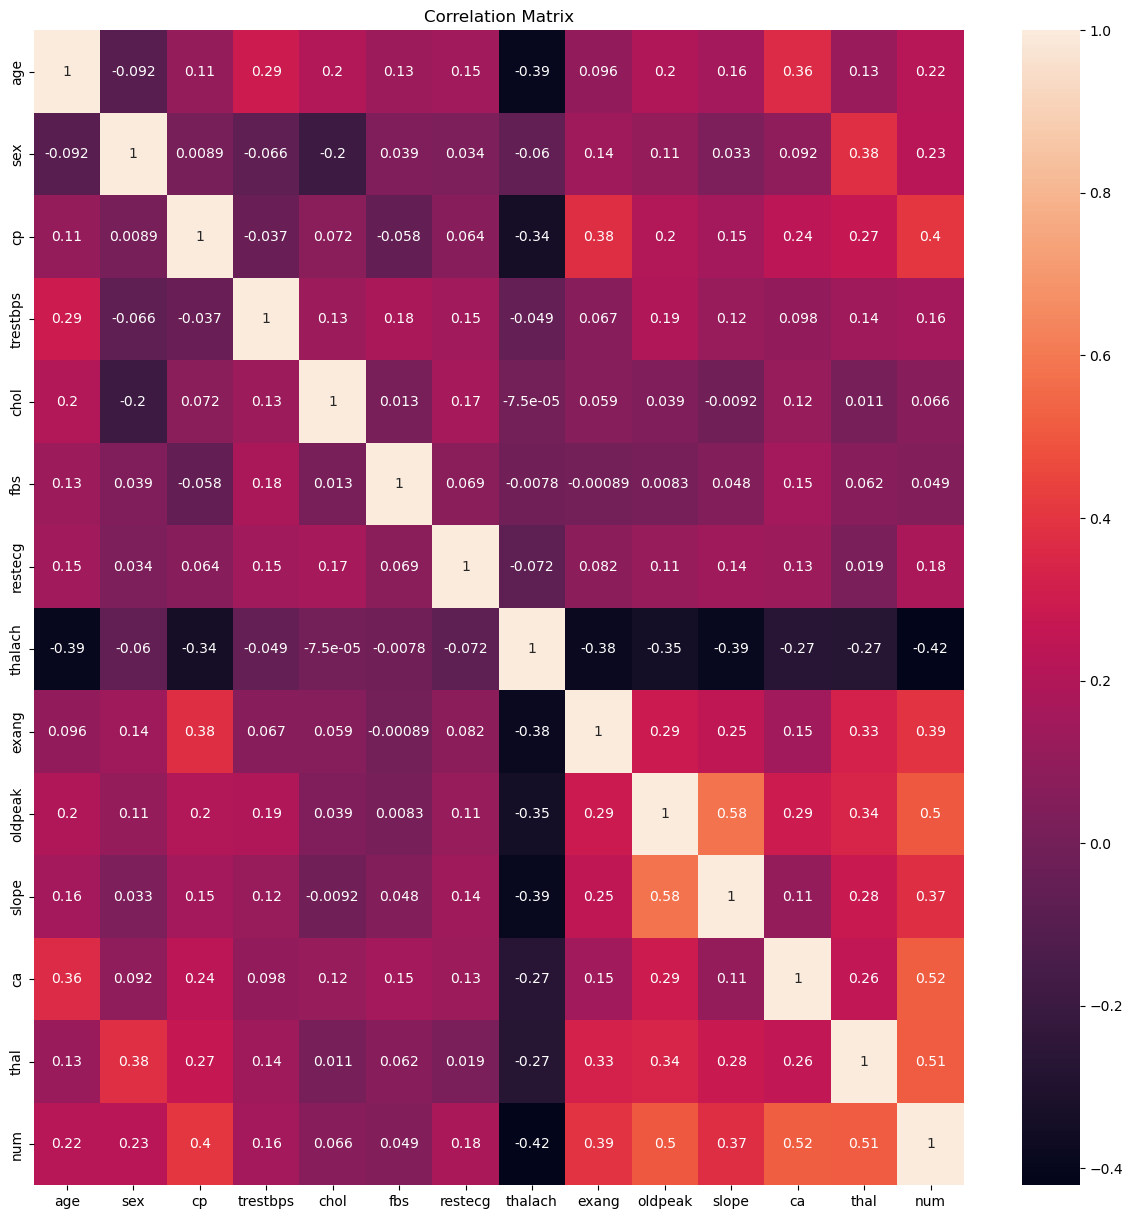

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(cor1,annot=True)
plt.title("Correlation Matrix")

In [35]:
x = df.drop('num',axis=1)
y = df['num']

In [36]:
mc = MinMaxScaler()
x_scaled = mc.fit_transform(x)
x_resampled = pd.DataFrame(x,columns=x.columns)

***RANDOM FOREST***

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y,test_size=0.3,random_state=42)


In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=None)            # Increase number of trees
    
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy


np.float64(56.67)

In [41]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.5666666666666667
              precision    recall  f1-score   support

           0       0.70      0.98      0.81        49
           1       0.00      0.00      0.00        17
           2       0.22      0.20      0.21        10
           3       0.14      0.09      0.11        11
           4       0.00      0.00      0.00         3

    accuracy                           0.57        90
   macro avg       0.21      0.25      0.23        90
weighted avg       0.42      0.57      0.48        90



In [42]:
train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.5666666666666667


***NOW BALACING DATA SET ***

In [43]:
X = df.drop('num',axis=1)
Y = df['num']

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)
x_resampled,y_resampled = smote.fit_resample(X,Y)
# Convert resampled arrays back to DataFrame for easier plotting
df_resampled = pd.DataFrame(x_resampled)
df_resampled['RISK'] = y_resampled

In [45]:
y_resampled.value_counts(True)

num
0    0.2
2    0.2
1    0.2
3    0.2
4    0.2
Name: proportion, dtype: float64

In [46]:
mc = MinMaxScaler()
x_scaled = mc.fit_transform(x_resampled)
x_resampled = pd.DataFrame(x_scaled,columns=x_resampled.columns)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)


In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=None)            # Increase number of trees
    
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy


np.float64(82.92)

In [49]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8291666666666667
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        46
           1       0.82      0.58      0.68        57
           2       0.72      0.94      0.82        36
           3       0.87      0.94      0.90        49
           4       0.90      1.00      0.95        52

    accuracy                           0.83       240
   macro avg       0.82      0.84      0.82       240
weighted avg       0.83      0.83      0.82       240



In [50]:
train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.8291666666666667
